<a href="https://colab.research.google.com/github/Sandeepro24/Potato-Disease-classifier/blob/main/Potato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Dataset'
valid_path = '/content/drive/MyDrive/Dataset'


In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# # view the structure of the model
# model.summary()


In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [36]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10, #beacause of lack of time i have used only 1 iteration
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
68/68 [==============================] - 52s 770ms/step - loss: 0.2723 - accuracy: 0.9401 - val_loss: 0.1444 - val_accuracy: 0.9624
Epoch 2/10
68/68 [==============================] - 51s 743ms/step - loss: 0.5150 - accuracy: 0.9154 - val_loss: 0.3858 - val_accuracy: 0.9336
Epoch 3/10
68/68 [==============================] - 50s 739ms/step - loss: 0.3118 - accuracy: 0.9480 - val_loss: 0.4675 - val_accuracy: 0.9219
Epoch 4/10
68/68 [==============================] - 50s 739ms/step - loss: 0.2580 - accuracy: 0.9517 - val_loss: 0.1414 - val_accuracy: 0.9693
Epoch 5/10
68/68 [==============================] - 51s 744ms/step - loss: 0.4424 - accuracy: 0.9345 - val_loss: 0.1867 - val_accuracy: 0.9693
Epoch 6/10
68/68 [==============================] - 50s 735ms/step - loss: 0.3114 - accuracy: 0.9545 - val_loss: 0.0913 - val_accuracy: 0.9837
Epoch 7/10
68/68 [==============================] - 50s 733ms/step - loss: 0.1420 - accuracy: 0.9726 - val_loss: 0.1766 - val_accuracy: 0.9684

In [39]:
scores = model.evaluate(training_set)

68/68 [==============================] - 36s 533ms/step - loss: 0.1880 - accuracy: 0.9684


In [37]:
import matplotlib.pyplot as plt

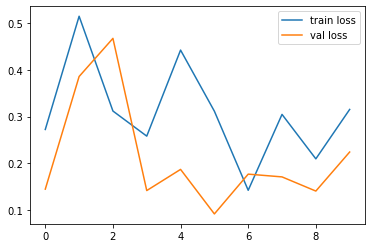

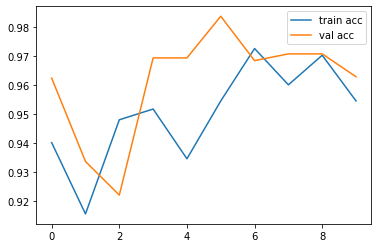

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [124]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [125]:
y_pred = model.predict(test_set)
y_pred

array([[9.9999952e-01, 3.5790268e-07, 1.2122578e-07],
       [9.9207616e-01, 2.2763606e-05, 7.9011889e-03],
       [9.9946564e-01, 1.9453149e-04, 3.3978696e-04],
       ...,
       [4.6499386e-01, 4.8705247e-01, 4.7953643e-02],
       [7.3570806e-01, 1.6038245e-02, 2.4825376e-01],
       [2.7077490e-02, 9.7196770e-01, 9.5483212e-04]], dtype=float32)

In [126]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [127]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

SECOND MODEL using resnet50

In [49]:
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input

In [50]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Dataset'
valid_path = '/content/drive/MyDrive/Dataset'


In [51]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [52]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [59]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [54]:
# # view the structure of the model
# model.summary()

In [60]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [64]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [65]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
68/68 [==============================] - 112s 2s/step - loss: 1.4946 - accuracy: 0.6436 - val_loss: 0.7140 - val_accuracy: 0.8095
Epoch 2/10
68/68 [==============================] - 56s 825ms/step - loss: 0.6146 - accuracy: 0.7839 - val_loss: 1.3407 - val_accuracy: 0.5827
Epoch 3/10
68/68 [==============================] - 56s 826ms/step - loss: 0.5590 - accuracy: 0.8118 - val_loss: 0.6211 - val_accuracy: 0.7941
Epoch 4/10
68/68 [==============================] - 55s 816ms/step - loss: 0.5143 - accuracy: 0.8230 - val_loss: 0.6791 - val_accuracy: 0.7797
Epoch 5/10
68/68 [==============================] - 55s 815ms/step - loss: 0.5495 - accuracy: 0.8011 - val_loss: 0.4607 - val_accuracy: 0.8355
Epoch 6/10
68/68 [==============================] - 55s 815ms/step - loss: 0.6606 - accuracy: 0.7904 - val_loss: 0.8923 - val_accuracy: 0.6343
Epoch 7/10
68/68 [==============================] - 56s 826ms/step - loss: 0.4877 - accuracy: 0.8183 - val_loss: 0.5149 - val_accuracy: 0.8007
E

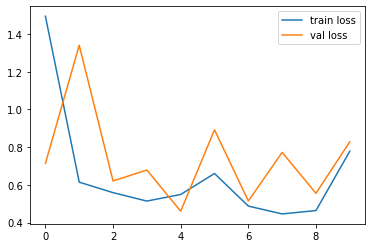

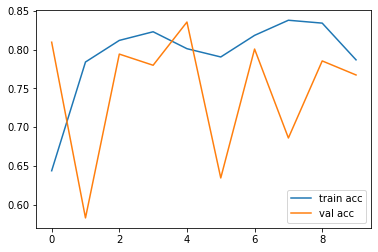

<Figure size 432x288 with 0 Axes>

In [66]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [118]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('resnet50.h5')

In [119]:
y_pred = model.predict(test_set)


In [120]:
y_pred

array([[8.1616670e-01, 9.1570757e-02, 9.2262551e-02],
       [9.8616612e-01, 3.7203657e-03, 1.0113601e-02],
       [3.6278448e-01, 5.3388709e-01, 1.0332841e-01],
       ...,
       [9.9958450e-01, 3.8120525e-05, 3.7739502e-04],
       [9.9999988e-01, 1.4105962e-07, 2.1024528e-08],
       [9.9992847e-01, 6.6285895e-05, 5.2337414e-06]], dtype=float32)

In [122]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [123]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

THIRD MODEL

In [68]:
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input

In [70]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Dataset'
valid_path = '/content/drive/MyDrive/Dataset'


In [72]:
resnet = ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234708992/234698864 [==============================] - 2s 0us/step


In [73]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [74]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [75]:
# model.summary()

In [76]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [82]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [83]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2152 images belonging to 3 classes.


In [84]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
68/68 [==============================] - 101s 1s/step - loss: 0.5070 - accuracy: 0.8257 - val_loss: 0.3701 - val_accuracy: 0.8620
Epoch 2/10
68/68 [==============================] - 98s 1s/step - loss: 0.4625 - accuracy: 0.8295 - val_loss: 0.4165 - val_accuracy: 0.8411
Epoch 3/10
68/68 [==============================] - 98s 1s/step - loss: 0.5646 - accuracy: 0.8155 - val_loss: 0.4477 - val_accuracy: 0.8518
Epoch 4/10
68/68 [==============================] - 98s 1s/step - loss: 0.4888 - accuracy: 0.8304 - val_loss: 0.4693 - val_accuracy: 0.8327
Epoch 5/10
68/68 [==============================] - 98s 1s/step - loss: 0.5218 - accuracy: 0.8299 - val_loss: 0.3479 - val_accuracy: 0.8778
Epoch 6/10
68/68 [==============================] - 98s 1s/step - loss: 0.4260 - accuracy: 0.8429 - val_loss: 0.5836 - val_accuracy: 0.8559
Epoch 7/10
68/68 [==============================] - 98s 1s/step - loss: 0.4844 - accuracy: 0.8327 - val_loss: 0.2986 - val_accuracy: 0.8968
Epoch 8/10
68/68 [=

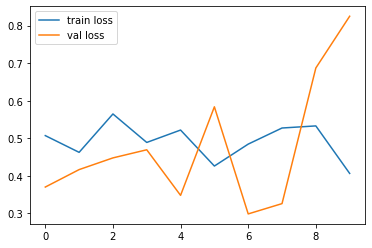

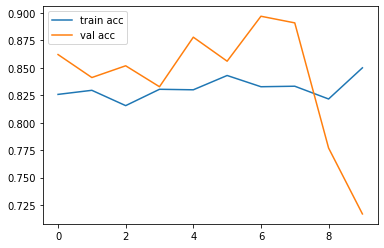

<Figure size 432x288 with 0 Axes>

In [85]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [114]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152.h5')

In [115]:
y_pred = model.predict(test_set)
y_pred

array([[9.7221339e-01, 1.2134624e-02, 1.5651982e-02],
       [9.0790367e-01, 7.5477570e-02, 1.6618721e-02],
       [9.9392903e-01, 6.7796512e-04, 5.3930404e-03],
       ...,
       [9.6141204e-02, 8.7992507e-01, 2.3933789e-02],
       [8.3235568e-01, 1.4353706e-01, 2.4107253e-02],
       [1.0000000e+00, 8.7416225e-09, 3.2327427e-10]], dtype=float32)

In [116]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [117]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

ENSEMBLING 3 MODELS

In [163]:

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from keras.layers.embeddings import Embedding
import tensorflow as tf
import os

In [169]:
# def load_all_models():
#     all_models = []
#     model_names = ['model_inception.h5', 'resnet50.h5', 'model_resnet152.h5']
#     model = tf.keras.models.load_model("/content/model_inception.h5")
#     all_models.append(model)
#     model = tf.keras.models.load_model("/content/model_resnet50.h5")
#     all_models.append(model)
#     model = tf.keras.models.load_model("/content/model_resnet152.h5")
#     all_models.append(model)
#     return all_models
def load_all_models():
    all_models = []
    model_names = ['model_inception.h5', 'resnet50.h5', 'model_resnet152.h5']
    for model_name in model_names:
        filename = os.path.join('/content/', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models

In [191]:
def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
            layer.name = "lyr" + str(i)
            layer.trainable = False
    ensemble_visible = [model.input for model in models]
    ensemble_outputs = [model.output for model in models]
    merge = tf.keras.layers.concatenate(ensemble_outputs)
    merge = tf.keras.layers.Dense(10, activation='relu')(merge)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
    model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [180]:
models = load_all_models()

loaded: /content/model_inception.h5
loaded: /content/resnet50.h5
loaded: /content/model_resnet152.h5


In [192]:
model = ensemble_model(models)

AttributeError: ignored

In [143]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


TypeError: ignored

In [145]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


FileNotFoundError: ignored